<a href="https://colab.research.google.com/github/HolymixMe/ecommerce_analyst/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Fahmi Hussain
- **Email:** fahmisajaa@gmail.com
- **ID Dicoding:** Muhammad Fahmi Hussain

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana persebaran kawasan dari customer?
- Pertanyaan 2 : Apakah terdapat korelasi antara lamanya waktu pengiriman dengan review score?
- Pertanyaan 3 : Berapa kali angsuran yang biasanya customer bayar ketika melakukan pembayaran dengan kartu kredit?


## Import Semua Packages/Library yang Digunakan

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [100]:
df_customers = pd.read_csv('/content/customers_dataset.csv')
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [101]:
df_geolocations = pd.read_csv('/content/geolocation_dataset.csv')
df_geolocations

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
821356,78070,-15.604093,-56.136905,cuiaba,MT
821357,78077,-15.605721,-56.045065,cuiaba,MT
821358,78048,-15.576087,-56.085830,cuiaba,MT
821359,78060,-15.593328,-56.078921,cuiabá,MT


In [102]:
df_items = pd.read_csv('/content/order_items_dataset.csv')
df_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [103]:
df_payments = pd.read_csv('/content/order_payments_dataset.csv')
df_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [104]:
df_reviews = pd.read_csv('/content/order_reviews_dataset.csv')
df_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [105]:
df_orders = pd.read_csv('/content/orders_dataset.csv')
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [106]:
df_product_category = pd.read_csv('/content/product_category_name_translation.csv')
df_product_category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [107]:
df_products = pd.read_csv('/content/products_dataset.csv')
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [108]:
df_sellers = pd.read_csv('/content/sellers_dataset.csv')
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [109]:
# Menggabungkan semua data menjadi satu tabel
df1 = pd.merge(df_products, df_items, on='product_id', how='inner')
df2 = pd.merge(df_orders, df_customers, on='customer_id',how='inner')
df3 = pd.merge(df1, pd.merge(df2, df_payments, on='order_id', how='inner'), on='order_id', how='inner')
df4 = pd.merge(df3, df_reviews, on='order_id', how='inner')
df = pd.merge(df4, df_sellers, on='seller_id', how='inner')


### Assessing Data

In [110]:
df_customers.isnull().sum(), df_customers.duplicated().sum(),


(customer_id                 0
 customer_unique_id          0
 customer_zip_code_prefix    0
 customer_city               0
 customer_state              0
 dtype: int64,
 0)

In [111]:
df_geolocations.isnull().sum(), df_geolocations.duplicated().sum()


(geolocation_zip_code_prefix    0
 geolocation_lat                0
 geolocation_lng                0
 geolocation_city               0
 geolocation_state              1
 dtype: int64,
 222982)

In [112]:
df_items.isnull().sum(), df_items.duplicated().sum()


(order_id               0
 order_item_id          0
 product_id             0
 seller_id              0
 shipping_limit_date    0
 price                  0
 freight_value          0
 dtype: int64,
 0)

In [113]:
df_payments.isnull().sum(), df_payments.duplicated().sum()


(order_id                0
 payment_sequential      0
 payment_type            0
 payment_installments    0
 payment_value           0
 dtype: int64,
 0)

In [114]:
df_reviews.isnull().sum(), df_reviews.duplicated().sum()


(review_id                      0
 order_id                       0
 review_score                   0
 review_comment_title       87656
 review_comment_message     58247
 review_creation_date           0
 review_answer_timestamp        0
 dtype: int64,
 0)

In [115]:
df_orders.isnull().sum(), df_orders.duplicated().sum()


(order_id                            0
 customer_id                         0
 order_status                        0
 order_purchase_timestamp            0
 order_approved_at                 160
 order_delivered_carrier_date     1783
 order_delivered_customer_date    2965
 order_estimated_delivery_date       0
 dtype: int64,
 0)

In [116]:
df_product_category.isnull().sum(), df_product_category.duplicated().sum()


(product_category_name            0
 product_category_name_english    0
 dtype: int64,
 0)

In [117]:
df_products.isnull().sum(), df_products.duplicated().sum()


(product_id                      0
 product_category_name         610
 product_name_lenght           610
 product_description_lenght    610
 product_photos_qty            610
 product_weight_g                2
 product_length_cm               2
 product_height_cm               2
 product_width_cm                2
 dtype: int64,
 0)

In [118]:
df_sellers.isnull().sum(), df_sellers.duplicated().sum()


(seller_id                 0
 seller_zip_code_prefix    0
 seller_city               0
 seller_state              0
 dtype: int64,
 0)

In [119]:
df.isnull().sum(), df.duplicated().sum()


(product_id                            0
 product_category_name              1695
 product_name_lenght                1695
 product_description_lenght         1695
 product_photos_qty                 1695
 product_weight_g                     20
 product_length_cm                    20
 product_height_cm                    20
 product_width_cm                     20
 order_id                              0
 order_item_id                         0
 seller_id                             0
 shipping_limit_date                   0
 price                                 0
 freight_value                         0
 customer_id                           0
 order_status                          0
 order_purchase_timestamp              0
 order_approved_at                    15
 order_delivered_carrier_date       1235
 order_delivered_customer_date      2471
 order_estimated_delivery_date         0
 customer_unique_id                    0
 customer_zip_code_prefix              0
 customer_city  

Terdapat data duplikat pada dataset geolocations.
Sementara itu, terdapat missing value pada dataset reviews, orders dan products


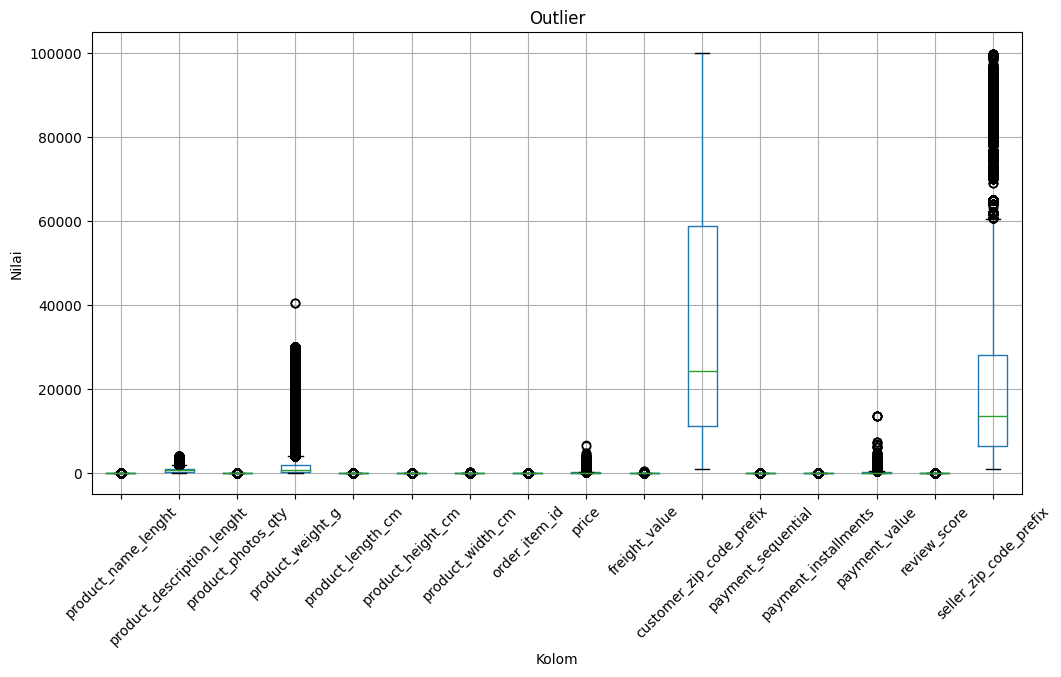

In [120]:
# Membuat boxplot untuk mengecek outlier
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Outlier')
plt.ylabel('Nilai')
plt.xlabel('Kolom')
plt.xticks(rotation=45)
plt.show()

### Cleaning Data

In [121]:
# Menghapus data duplikat
df_geolocations.drop_duplicates(keep='first', inplace=True)


In [122]:
# Mengisi nilai yang kosong dengan rata-rata
df['product_weight_g'].fillna(df['product_weight_g'].mean(), inplace=True)
df['product_length_cm'].fillna(df['product_length_cm'].mean(), inplace=True)
df['product_height_cm'].fillna(df['product_height_cm'].mean(), inplace=True)
df['product_width_cm'].fillna(df['product_width_cm'].mean(), inplace=True)

In [123]:
# Mengganti nilai yang kosong dengan median
df['product_name_lenght'].fillna(df['product_name_lenght'].median(), inplace=True)
df['product_description_lenght'].fillna(df['product_description_lenght'].median(), inplace=True)
df['product_photos_qty'].fillna(df['product_photos_qty'].median(), inplace=True)


In [124]:
# Mengganti data kosong yang ada pada kolom kategori produk dengan modus
df['product_category_name'].fillna(df['product_category_name'].mode().iloc[0], inplace=True)

In [125]:
# Melakukan imputasi manual pada data kosong di reviews
df['review_comment_title'].fillna(value='No Tittle', inplace=True)
df['review_comment_message'].fillna(value='No Comment', inplace=True)

In [126]:
# Menghapus sisa data kosong
df.dropna(inplace=True)

In [127]:
# Mengidentifikasi kolom numerik
numeric_cols = df.select_dtypes(include='number').columns

# Menghapus nilai outlier dalam kolom numerik
for col in numeric_cols:
    if df[col].dtype in ['float64', 'int64']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,18.30,d71da8fd8c6e3adef26be965f065b8a1,5,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02,3694,sao paulo,SP
2,091107484dd7172f5dcfed173e4a960e,perfumaria,50.0,260.0,2.0,183.0,16.0,8.0,13.0,a7708ffa8966514c098d15e1abfa6417,...,57.75,39489f8518181b82cb86ce264e1ccc55,5,Agora sim,Recebido o pedido finalmente produto ótimo,2018-04-26 00:00:00,2018-04-30 21:15:06,3694,sao paulo,SP
4,2eadf6089620e82047e4d24101dc6759,perfumaria,44.0,749.0,1.0,500.0,16.0,14.0,14.0,f8bb4d404d187c79b86ccf852dfa345e,...,24.27,c228a122ffc0ccc9a91558dcb49de760,4,No Tittle,No Comment,2018-06-21 00:00:00,2018-06-22 12:12:26,3694,sao paulo,SP
5,2e5cf3208803b03c62f319e2518e35c0,perfumaria,56.0,538.0,1.0,100.0,16.0,14.0,14.0,4ff76509ab49169df6382331fae23a4f,...,31.55,a41bac6fa726d9d90559cb2c85c6f251,5,Robson,No Comment,2018-05-10 00:00:00,2018-05-10 19:47:45,3694,sao paulo,SP
19,35c07f585b553421c3eac1f3acd0a59e,perfumaria,56.0,410.0,1.0,100.0,16.0,11.0,11.0,b51858d1888f8dfa7ffe83f06fbcb3c3,...,34.12,cf3462984fdd754e341ccc94088b91cd,5,No Tittle,No Comment,2018-06-21 00:00:00,2018-06-22 13:04:51,3694,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117314,edaf40b482ce18cabb1e1c00c4cfa2d1,livros_interesse_geral,31.0,783.0,2.0,500.0,21.0,2.0,14.0,7692d9058f8ce2c30f96713424aa3b12,...,47.53,a3846fd706f469e868ac03502eac301d,5,No Tittle,"Primeira compra, graças a Deus deu tudo certo.",2017-12-22 00:00:00,2017-12-25 02:15:20,21545,rio de janeiro,RJ
117315,edaf40b482ce18cabb1e1c00c4cfa2d1,livros_interesse_geral,31.0,783.0,2.0,500.0,21.0,2.0,14.0,db5439de7f77d9b66eb4f4de0d9b922c,...,44.00,e5be8700b32846a22497bdf592b0b813,5,No Tittle,No Comment,2017-12-13 00:00:00,2017-12-14 16:33:23,21545,rio de janeiro,RJ
117316,edaf40b482ce18cabb1e1c00c4cfa2d1,livros_interesse_geral,31.0,783.0,2.0,500.0,21.0,2.0,14.0,e8c9b0d66cadc26a3f329d777f0eff7f,...,55.53,89bb68a927caa931e0375787a95dde79,5,No Tittle,No Comment,2017-12-12 00:00:00,2017-12-13 03:36:12,21545,rio de janeiro,RJ
117317,edaf40b482ce18cabb1e1c00c4cfa2d1,livros_interesse_geral,31.0,783.0,2.0,500.0,21.0,2.0,14.0,f97bbed1ebd38ac39d7335b1ff49ab71,...,44.00,8b5192fe570164791d6437ed64adb39d,5,No Tittle,"Entrega rapida, produto em perfeito estado.",2017-08-15 00:00:00,2017-08-15 19:41:10,21545,rio de janeiro,RJ


## Exploratory Data Analysis (EDA)

In [128]:
# Bagaimana persebaran kawasan dari customer?
df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    18981
MG     4803
RJ     4728
RS     1978
PR     1860
SC     1272
BA     1250
DF      866
ES      834
GO      832
PE      439
CE      339
MT      310
MS      280
PA      260
MA      117
PI       90
RN       89
SE       78
PB       64
AL       63
TO       55
AM       44
RO       36
AP       12
AC       10
RR        5
Name: customer_id, dtype: int64

In [129]:
# Apakah terdapat korelasi antara lamanya waktu pengiriman dengan review score?

# Mengubah data menjadi bertipe datetime
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Menghitung lamanya waktu pengiriman
delivery_time = df["order_delivered_customer_date"] - df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
df["delivery_time"] = round(delivery_time/86400)

# Menghitung koefisien korelasi
correlation = df['review_score'].corr(df['delivery_time'])
print("Koefisien Korelasi antara Review Score dan Product Photo Quality:", correlation)

<ipython-input-129-1834c9430093>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
<ipython-input-129-1834c9430093>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])


Koefisien Korelasi antara Review Score dan Product Photo Quality: -0.15391910593309116


In [130]:
# Berapa kali angsuran yang biasanya customer bayar ketika melakukan pembayaran dengan kartu kredit?

credit = df[df['payment_type'] == 'credit_card'] # Membuat dataset dimana tipe pembayaran = kartu kredit
credit.groupby(by="payment_installments").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value        
                      nunique           min     max
payment_installments                               
1                       13183          0.01  222.90
2                        5441         20.08  222.68
3                        4512         30.00  223.01
4                        2844         40.00  223.19
5                        1940         49.99  221.79
6                        1346         60.00  223.01

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana persebaran kawasan dari customer?


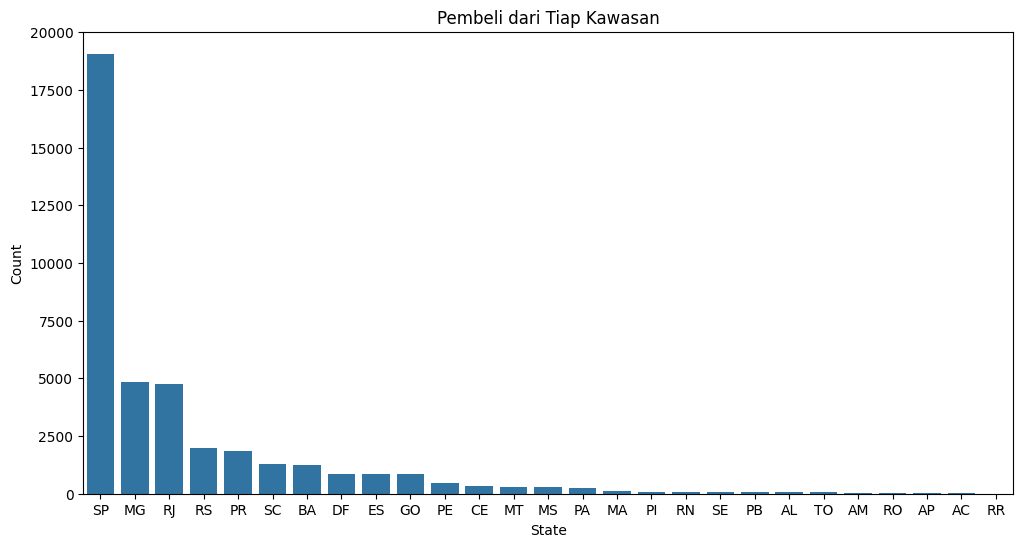

In [131]:
# Visualisasi data untuk mengetahui persebaran kawasan dari pembeli
country = df.groupby(['customer_state'])['customer_state'].value_counts().sort_values(ascending = False)

plt.figure(figsize=(12, 6))
sns.barplot(data=country)
plt.title("Pembeli dari Tiap Kawasan")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

### Pertanyaan 2: Apakah terdapat korelasi antara lamanya waktu pengiriman dengan review score ?

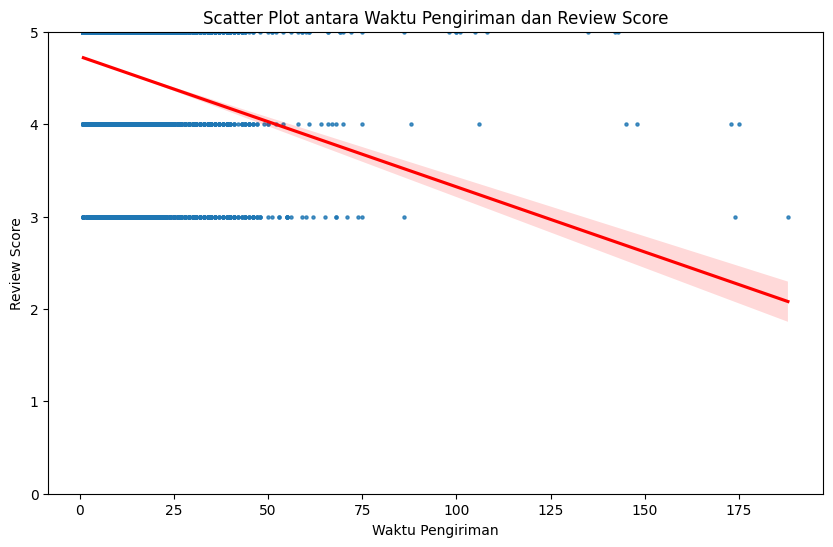

In [132]:
# Visualisasi scatter plot dengan garis korelasi
plt.figure(figsize=(10, 6))
sns.regplot(x='delivery_time', y='review_score', data=df, scatter_kws={'s':5}, line_kws={'color':'red'})
plt.title('Scatter Plot antara Waktu Pengiriman dan Review Score')
plt.xlabel('Waktu Pengiriman')
plt.ylabel('Review Score')
plt.ylim(0, 5)
plt.show()

### Pertanyaan 3: Berapa kali angsuran yang biasanya customer bayar ketika melakukan pembayaran dengan kartu kredit?


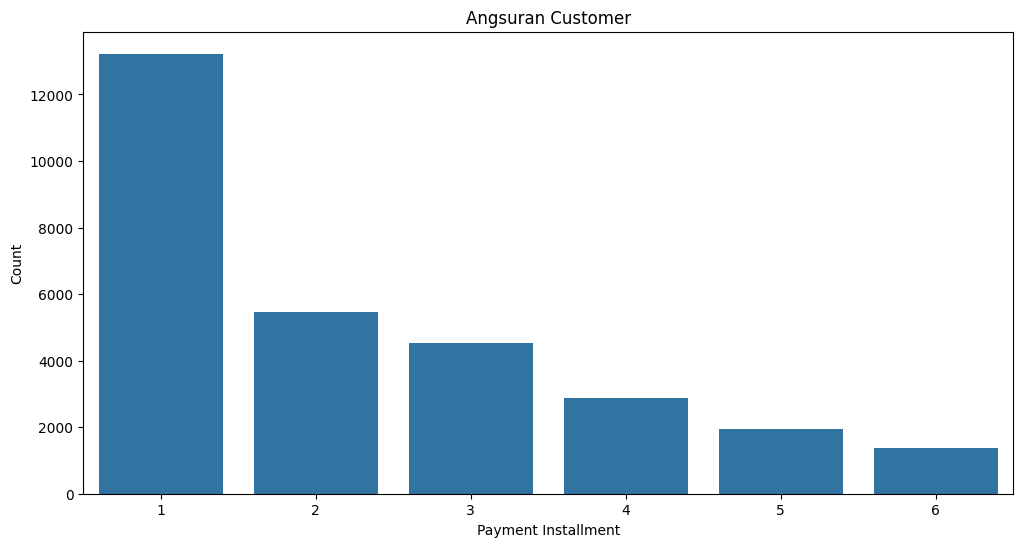

In [133]:
# Visualisasi data untuk mengetahui jumlah customer yang melakukan pembayaran secara angsuran
credit = df[df['payment_type'] == 'credit_card'] # Membuat dataset dimana tipe pemabayaran = kartu kredit
new = credit.query('payment_installments >= 1') # Membuat dataset dimana angsuran => 1
credit_count = new.payment_installments.value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(data=credit_count)
plt.title("Angsuran Customer")
plt.xlabel("Payment Installment")
plt.ylabel("Count")
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Dapat dilihat bahwa kawasan SP menjadi kawasan yang sangat vital bagi perkembangan industri. Dimana hampir 5000 customer berasal dari kawasan tersebut. Sementara kawasan RR menjadi kawasasn dengan customer paling sedikit, mungkin diperlukan upaya promosi dan kampanye untuk memperkenalkan produk kepada customer di wilayah RR.
- Conclution pertanyaan 2 : Dapat dilihat bahwa terdapat korelasi negatif antara waktu pengiriman dan review score. Artinya, ketika waktu pengiriman meningkat (lebih lama), review score cenderung menurun. Walaupun korelasinya rendah (-0.3) namun perusahaan perlu fokus pada cara untuk mempercepat proses pengiriman guna meningkatkan kepuasan pelanggan.
- Conclution pertanyaan 3 : Dapat dilihat bahwa pelanggan dengan kartu kredit kebanyakan tetap membayar dengan 1 kali angsuran. Pilihan untuk membayar penuh di muka menunjukkan bahwa pelanggan mungkin memiliki kepercayaan yang tinggi terhadap produk atau layanan.

In [134]:
df.to_csv('main_data.csv', index=False)
